# Chapter 9: Files and Exceptions

9. 1 ***(Class Average: Writing Grades to a Plain Text File)*** Figure 3.2 presented a class average script in which you could enter any number of grades followed by a sentinel value, then calculate the class average.\
Another approach would be to read the grades from a file. In an IPython session, write code that enables you to store any number of grades into a grades.txt plain text file.

In [1]:
def writing_grades() -> None:
    
    # initialization phase
    grade_counter = int()  # number of grades entered

    # processing phase
    grade = int(input('Enter grade, -1 to end: '))  # get one grade

    while grade != -1:
        
        gradesFile = open("grades.txt", "a")
        gradesFile.write(f"{grade_counter +1}) {grade}\n")
        gradesFile.close()
        grade_counter += 1
        
        grade = int(input('Enter grade, -1 to end: '))

9. 2 ***(Class Average: Reading Grades from a Plain Text File)*** In an IPython session, write code that reads the grades from the grades.txt file you created in the previous exercise. Display the individual grades and their total, count and average.

In [2]:
def reading_grades() -> None:
    # initialization phase
    total = int()  # sum of grades
    grade_counter = int()  # number of grades entered

    # processing phase
    with open("grades.txt", mode= "r") as grades:
        for grade in grades:
            index , grade= grade.split()
            print(index, grade)
            total += int(grade)
            grade_counter += 1
            
    # termination phase
    if grade_counter != 0:
        average = total / grade_counter
        print(f"Number of grades: {grade_counter}")
        print(f"Total: {total}")
        print(f'Class average is {average:.2f}')
    else:
        print('No grades were entered')

9. 3 ***(Class Average: Writing Student Records to a CSV File)*** An instructor teaches a class in which each student takes three exams. The instructor would like to store this information in a file named grades.csv for later use. Write code that enables an instructor to enter each student’s first name and last name as strings and the student’s three exam grades as integers. Use the csv module to write each record into the grades.csv file. Each record should be a single line of text in the following CSV format: $firstname$, $lastname$, $exam1grade$, $exam2grade$, $exam3grade$.

In [ ]:
def writing_student_records() -> None:
    '''This function takes in a student's name and three grades, 
        and writes them to a csv file
    '''
    
    import csv
    #initialization Phase
    name = input("Enter First and Last name (-1 to exit)")

    #Processing Phase
    while not name.lstrip('-').isdigit():
        
        student = name.split()
        try: 
            student.append(int(input("Enter the first grade")))
            student.append(int(input("Enter the second grade")))
            student.append(int(input("Enter the third grade")))
            
            #Termination Phase
            with open("grades.csv", mode="a", newline='') as grades:
                csv.writer(grades).writerow(student)
            
        except:
            print("The grade must be an integer")
            
        name = input("Enter First and Last name (-1 to exit)")

9. 4 ***(Class Average: Reading Student Records from a CSV File)*** Use the csv module to read the grades.csv file from the previous exercise. Display the data in tabular format.


In [3]:
def reading_student_records() ->None:
    '''It reads the grades.csv file and prints the student's name, first grade, second grade, and third
    grade
    
    '''
    import csv 
    with open("grades.csv", mode= "r", newline="") as grades:
        reader = csv.reader(grades)
        
        print(f"{'Name':<10}\t{'First Grade':>25}{'Second Grade':>25}{'Third Grade':>25}")
        
        for grade in reader:
            
            name = ' '.join(grade[:2])
            first_grade, second_grade, third_grade = grade[2:]
            
            print(f"{name:<10}\t{first_grade:>25}{second_grade:>25}{third_grade:>25}")

9. 5 ***(Class Average: Creating a Grade Report from a CSV File)*** Modify your solution to the preceding exercise to create a grade report that displays each student’s average to the right of that student’s row and the class average for each exam below that exam’s column.

In [2]:
def grade_report() -> None:
    '''It reads a csv file, prints the name, grades, and average of each student, and then prints the class
    average
    
    '''
    
    from csv import reader
    from numpy import array
    
    with open("grades.csv", mode='r', newline='') as grades:
        
        grades_record = list()
        
        print(f"{'Name':<10}\t{'First Grade':>25}{'Second Grade':>25}{'Third Grade':>25}{'Average':>25}")
        print()
        
        for record in reader(grades):
            
            name = ' '.join(record[:2])
            average = array(record[2:]).astype(int).mean()
            grades_record.append(record[2:])
            
            print(f"{name:<10}\t{record[2]:>25}{record[3]:>25}{record[4]:>25}{average:>25.2f}")
        
        grades_record = array(grades_record).astype(int).mean(axis=0) 
        print()
        print(f"{'Class Average':<10}\t{grades_record[0]:>25.2f}{grades_record[1]:>25.2f}{grades_record[2]:>25.2f}")

9. 6 ***(Class Average: Writing a Gradebook Dictionary to a JSON File)*** Reimplement Exercise 9.3 using the json module to write the student information to the file in JSON format. For this exercise, create a dictionary of student data in the following format:
```python
    gradebook_dict = {'students': [student1dictionary, student2dictionary, ...]}
```
Each dictionary in the list represents one student and contains the keys *'first_name'*, *'last_name'*, *'exam1'*, *'exam2'* and *'exam3'*, which map to the values representing each student's first name (string), last name (string) and three exam scores (integers).
Output the gradebook_dict in JSON format to the file grades.json

In [1]:

def writing_gradebook() -> None:
    '''This function takes in a student's name and three grades, 
        and writes them to a json file
    '''
    import json
    
    #initialization Phase
    name = input("Enter First and Last name (-1 to exit)")
    gradebook_dict = {"Students": list()}

    #Processing Phase
    while not name.lstrip('-').isdigit():
       
        try: 
            student = dict()
            student["Name"], student["Last Name"]  = name.split()
            student["exam1"] = int(input("Enter the first grade"))
            student["exam2"] = int(input("Enter the second grade"))
            student["exam3"] = int(input("Enter the third grade"))
            gradebook_dict["Students"].append(student)

        except:
            print("The grade must be an integer")
            
        name = input("Enter First and Last name (-1 to exit)")
    
    # Termination Phase        
    if gradebook_dict["Students"]:
        
        with open("grades.json", mode= "w") as grades:
            
            json.dump(gradebook_dict, grades)

9. 7 ***(Class Average: Reading a Gradebook Dictionary from a JSON File)*** Reimplement Exercise 9.4 using the json module to read the grades.json file created in the previous exercise. Display the data in tabular format, including an additional column showing each student’s average to the right of that student’s three exam grades and an additional row showing the class average on each exam below that exam’s column.

In [ ]:

def reading_gradebook() -> None:
    '''It reads a json file, prints the name, grades, and average of each student, and then prints the class
    average
    '''
    
    from json import load
    from numpy import array
   
    grades_record = list()
    
    with open("grades.json", mode= 'r') as grades:
        gradebook_dict = load(grades)
    
    print(f"{'Name':<10}\t{'First Grade':>25}{'Second Grade':>25}{'Third Grade':>25}{'Average':>25}")
    print()

    for students in gradebook_dict.values():
        for student in students:
            
            name =  ' '.join( list(student.values())[:2])
            exams =  list(student.values())[2:]
            average = sum(exams) / len(exams)
            grades_record.append(exams)
            
            print(f"{name:<10}\t{exams[0]:>25}{exams[1]:>25}{exams[2]:>25}{average:>25.2f}")
    
    grades_record = array(grades_record).mean(axis=0)
    
    print()
    print(f"{'Class Average':<10}\t{grades_record[0]:>25.2f}{grades_record[1]:>25.2f}{grades_record[2]:>25.2f}")

9. 8 ***(pickle Object Serialization and Deserialization)*** We mentioned that we prefer to use JSON for object serialization due to the Python documentation’s stern security warnings about pickle. However, pickle has been used to serialize objects for many years, so you’re likely to encounter it in Python legacy code. According to the documentation,*“If you are doing your own pickle writing and reading, you’re safe (provided no one else has access to the pickle file, of course.)”* .Reimplement your solutions to *Exercises 9.6–9.7* using the pickle module’s dump function to serialize the dictionary into a file and its load function to deserialize the object. Pickle is a binary format, so this exercise requires binary files. Use the file-open mode *'wb'* to open the binary file for writing and *'rb'* to open the binary file for reading. Function dump receives as arguments an object to serialize and a file object in which to write the serialized object. Function load receives the file object containing the serialized data and returns the original object. The Python documentation suggests the pickle file extension .p .

In [1]:
def writing_Gradebook_Pickle() -> None:
    '''This function takes in a student's name and three grades, 
        and writes them to a pickle file
    '''
    import pickle
    
    #initialization Phase
    name = input("Enter First and Last name (-1 to exit)")
    gradebook_dict = {"Students": list()}

    #Processing Phase
    while not name.lstrip('-').isdigit():
       
        try: 
            student = dict()
            student["Name"], student["Last Name"]  = name.split()
            student["exam1"] = int(input("Enter the first grade"))
            student["exam2"] = int(input("Enter the second grade"))
            student["exam3"] = int(input("Enter the third grade"))
            gradebook_dict["Students"].append(student)

        except:
            print("The grade must be an integer")
            
        name = input("Enter First and Last name (-1 to exit)")
    
    # Termination Phase        
    if gradebook_dict["Students"]:
        
        with open("grades.p", mode= "wb") as grades:
            
            pickle.dump(gradebook_dict, grades)


def reading_Gradebook_Pickle() -> None:
    '''It reads a pickle file, prints the name, grades, and average of each student, and then prints the class
    average
    '''
    
    from pickle import load
    from numpy import array
   
    grades_record = list()
    
    with open("grades.p", mode= 'rb') as grades:
        gradebook_dict = load(grades)
    
    print(f"{'Name':<10}\t{'First Grade':>25}{'Second Grade':>25}{'Third Grade':>25}{'Average':>25}")
    print()

    for students in gradebook_dict.values():
        for student in students:
            
            name =  ' '.join( list(student.values())[:2])
            exams =  list(student.values())[2:]
            average = sum(exams) / len(exams)
            grades_record.append(exams)
            
            print(f"{name:<10}\t{exams[0]:>25}{exams[1]:>25}{exams[2]:>25}{average:>25.2f}")
    
    grades_record = array(grades_record).mean(axis=0)
    
    print()
    print(f"{'Class Average':<10}\t{grades_record[0]:>25.2f}{grades_record[1]:>25.2f}{grades_record[2]:>25.2f}")

9. 10 ***(Project: Analyzing a Book from Project Gutenberg)*** A great source of plain text files is the collection of over 57,000 free e-books at Project Gutenberg:


&emsp;&emsp;&emsp;&emsp; https://www.gutenberg.org/

These books are out of copyright in the United States. For information about Project Gutenberg’s Terms of Use and copyright in other countries, see:\
&emsp;&emsp;&emsp;&emsp; https://www.gutenberg.org/wiki/Gutenberg:Terms_of_Use

Download the text-file version of Pride and Prejudice from Project Gutenberg

&emsp;&emsp;&emsp;&emsp; https://www.gutenberg.org/ebooks/1342

Create a script that reads *Pride* and *Prejudice* from a text file. Produce statistics about the book, including the total word count, the total character count, the average word length, the average sentence length, a word distribution containing frequency counts of all words, and the top 10 longest words. In the *“Natural Language Processing (NLP)”* chapter, you’ll find lots of more sophisticated techniques for analysing and comparing such texts.\
&emsp;&emsp; Each Project Gutenberg e-book begins and ends with some additional text, such as licensing information, which is not part of the e-book itself. You may want to remove that text from your copy of the book before analysing its text.

In [5]:
# Exercise: 9.10 

def clean_text(path: str, RENAME = False) -> None:
    '''It takes the text file, finds the start and end of the text, and writes the text between the start
    and end to a new file
    
    Parameters
    -----------
    path : str
        str = The path to the text file .
        
    RENAME : bool
        If True it Renames the new file as the old one and deletes the old file.
        Otherwise (default) the file is renamed with the prefix "_Old" and 
        the new file with the prefix "_Updated".
    '''

    from os import rename, remove
    from re import findall
    
    old_file = r''.join(path.replace('.txt', '_Old.txt')) 
    new_file = r''.join(path.replace('.txt', '_Updated.txt'))
    
    with open( r''.join(path), mode="r", encoding= 'UTF-8') as old_text:
        
        pattern = r"\*{3}[\s\w]+\*{3}" # This is the START and END pattern of the Guttenberg Project books (e.g. *** START ... ***).
        
        with  open(new_file, mode='w', encoding='UTF-8') as new_text:
            
            sentinel = False
            for lines in old_text:
                
                if findall( pattern, lines):
                    # Sentinel is NoneType when the line of text matches the end of the book. 
                    sentinel = True if sentinel is False else None # This avoids unnecessary iteration.
                    
                    if sentinel is None:
                        new_text.write(lines + "\n")
                        break
                    
                if sentinel:
                    new_text.write(lines + "\n")
                

    rename( r''.join(path), old_file)
    
    if RENAME:
        rename(new_file, r''.join(path))
        remove(old_file)


def stats_text(path: str) -> dict:
    '''This function takes a text file as input and returns a dictionary with the following statistics:
    total chars, total words, average word length, average sentence length, word distribution,
    the ten longest word
    
    Parameters
    ----------
    path : str
        str = The path to the text file .
    
    Returns
    -------
        A dictionary with the following keys:
        total_chars, total_words, 
        average_word_length, average_sentence_length, 
        word_distribution, the_ten_longest_word
    '''
    
    from re import sub
    from pandas import Series
    from nltk.corpus import stopwords
    

    # Initialization Phase:
    stats = {
        'total_chars': int(),
        'total_words': int(),
        'average_word_length': float(),
        'average_sentence_length': {
            "length_sentences": float(),
            "num_sentences": int()
            },
        'word_distribution': dict(),
        'the_ten_longest_word': list()
    }

    stopwords = stopwords.words("english") 
    
    
    with open(r''.join(path), mode="r", encoding= 'UTF-8') as text:
        
        #Processing Phase: Obtaining statistics
        for line in text:
            
            line = line.strip()
            
            if line:
        
                for word in sub('[^A-Za-z]', ' ',line).split(): # Filter only the words
                        
                    stats['total_words'] += 1 
                    stats['average_word_length'] += len(word)
                    
                    if word.capitalize() in stats['word_distribution']:
                        stats['word_distribution'][word.capitalize()] += 1
                        
                    elif word.lower() not in stopwords:
                        stats['word_distribution'][word.capitalize()] = 1 
                        
                stats['total_chars'] += len(line)
                stats['average_sentence_length']['length_sentences'] += len(sub(r"\W", " ", line).split())
                stats['average_sentence_length']['num_sentences'] += 1 
                
        # Termination Phase: 
        stats['the_ten_longest_word'] =  sorted(stats['word_distribution'].keys(), reverse=True, key= len)[:10]
        
        stats['word_distribution']  = Series(stats['word_distribution']).sort_values(ascending= False).to_dict()
        
        stats['average_word_length'] = round(stats['average_word_length']  / stats['total_words'], 3)

        stats['average_sentence_length'] = round(stats['average_sentence_length']['length_sentences'] / stats['average_sentence_length']['num_sentences'], 3)
        
    return stats
  
 
def displays_stats(stats: dict) -> None:
    '''The function displays the stats in a tabular format
    
    Parameters
    ----------
    stats : dict
        dict = { 'total_chars': int, 'total_words': int,
                 'average_word_length': int | float,'average_words_per_sentence': float | int, 
                 'word_distribution': dict(), 'the_ten_longest_word': list()
        }
    
    '''
    print(*(f"{key.replace('_',' ').title()}\t" for key in stats.keys())) # Columns: Total chars, Total words, etc..

    for values in stats.values():
        
        if isinstance(values, int | float):  # Displays the first four values of the first row 
            print(f"{values:<15,.2f}", end='\t ')  
            
        else:
            if isinstance(values, dict): # If values is "word distributions" 
                # then iterates only once through the iterables "Words distributions" and "Top Ten Longest Words"
                for key,  value, word in zip(values.keys(),
                                            values.values(), 
                                            stats['the_ten_longest_word'] ):
                
                    if stats['the_ten_longest_word'].index(word): # This displays the second to tenth rows
                        print(f"{key:>99}: {value} \t {word}".expandtabs(19))
                        
                    else: # This display the last two values of the first row
                        print(f"{key:>10}: {value:^2} \t\t {word:^2}".expandtabs(5))    
        
            else: #This makes the last row of the "Word Distributions" column more elegant.
                #And take advantage of the last iteration, which is no longer necessary 
                print(f"{'...':>99}") #because the values of "Top Ten Longest Words" have already been displayed
                
 
                
# clean_text(path= 'Pride and Prejudice by Jane Austen.txt', RENAME= True) 
stats = stats_text(path= r'Pride and Prejudice by Jane Austen.txt')
displays_stats(stats)

Total Chars	 Total Words	 Average Word Length	 Average Sentence Length	 Word Distribution	 The Ten Longest Word	
711,279.00     	 128,581.00     	 4.39           	 11.13          	      Start: 3             Disinterestedness
                                                                                            Project: 3             Misrepresentation
                                                                                          Gutenberg: 2             Communicativeness
                                                                                              Ebook: 2             Misunderstanding
                                                                                              Pride: 57            Superciliousness
                                                                                          Prejudice: 13            Incomprehensible
                                                                                       Illustration: 163         

9. 12 ***(Project: State-of-the-Union Speeches)*** Text files of all U.S. Presidents' State-of-the-Union speeches are available online. 
Download one of these speeches. Write a script that reads the speech from the file, then displays statistics about the speech,
including the total word count, the total character count, the average word length, the average sentence length, 
a word distribution of the words frequencies, and the top 10 longest words. 
In the "Natural Language Processing (NLP)" chapter, you’ll find lots of more sophisticated techniques for analyzing and comparing such texts.

In [3]:
#Exercise 9.12

def stats_text(path: str) -> dict:
    '''This function takes a text file as input and returns a dictionary with the following statistics:
    total chars, total words, average word length, average sentence length, word distribution,
    the ten longest word
    
    Parameters
    ----------
    path : str
        str = The path to the text file .
    
    Returns
    -------
        A dictionary with the following keys:
        total_chars, total_words, 
        average_word_length, average_sentence_length, 
        word_distribution, the_ten_longest_word
    '''
    
    from re import sub
    from pandas import Series
    from nltk.corpus import stopwords
    

    # Initialization Phase:
    stats = {
        'total_chars': int(),
        'total_words': int(),
        'average_word_length': float(),
        'average_sentence_length': {
            "length_sentences": float(),
            "num_sentences": int()
            },
        'word_distribution': dict(),
        'the_ten_longest_word': list()
    }

    stopwords = stopwords.words("english") 
    
    
    with open(r''.join(path), mode="r", encoding= 'UTF-8') as text:
        
        #Processing Phase: Obtaining statistics
        for line in text:
            
            line = line.strip()
            
            if line:
        
                for word in sub('[^A-Za-z]', ' ',line).split(): # Filter only the words
                        
                    stats['total_words'] += 1 
                    stats['average_word_length'] += len(word)
                    
                    if word.capitalize() in stats['word_distribution']:
                        stats['word_distribution'][word.capitalize()] += 1
                        
                    elif word.lower() not in stopwords:
                        stats['word_distribution'][word.capitalize()] = 1 
                        
                stats['total_chars'] += len(line)
                stats['average_sentence_length']['length_sentences'] += len(sub(r"\W", " ", line).split())
                stats['average_sentence_length']['num_sentences'] += 1 
                
        # Termination Phase: 
        stats['the_ten_longest_word'] =  sorted(stats['word_distribution'].keys(), reverse=True, key= len)[:10]

        stats['word_distribution']  = Series(stats['word_distribution']).sort_values(ascending= False).to_dict()
        
        stats['average_word_length'] = round(stats['average_word_length']  / stats['total_words'], 3)
        
        
        stats['average_sentence_length'] = round(stats['average_sentence_length']['length_sentences'] / stats['average_sentence_length']['num_sentences'], 3)
        
    return stats


def displays_stats(stats: dict) -> None:
    '''The function displays the stats in a tabular format
    
    Parameters
    ----------
    stats : dict
        dict = { 'total_chars': int, 'total_words': int,
                 'average_word_length': int | float,'average_words_per_sentence': float | int, 
                 'word_distribution': dict(), 'the_ten_longest_word': list()
        }
    
    '''
    print(*(f"{key.replace('_',' ').title()}\t" for key in stats.keys())) # Columns: Total chars, Total words, etc..

    for values in stats.values():
        
        if isinstance(values, int | float):  # Displays the first four values of the first row 
            print(f"{values:<15,.2f}", end='\t ')  
            
        else:
            if isinstance(values, dict): # If values is "word distributions" 
                # then iterates only once through the iterables "Words distributions" and "Top Ten Longest Words"
                for key,  value, word in zip(values.keys(),
                                            values.values(), 
                                            stats['the_ten_longest_word'] ):
                
                    if stats['the_ten_longest_word'].index(word): # This displays the second to tenth rows
                        print(f"{key:>99}: {value} \t {word}".expandtabs(19))
                        
                    else: # This display the last two values of the first row
                        print(f"{key:>10}: {value:^2} \t\t {word:^2}".expandtabs(5))   
        
            else: #This makes the last row of the "Word Distributions" column more elegant.
                #And take advantage of the last iteration, which is no longer necessary 
                print(f"{'...':>99}") #because the values of "Top Ten Longest Words" have already been displayed


stats = stats_text(path= r'President Trump\'s 2020 State of the Union Speech.txt')
displays_stats(stats)

Total Chars	 Total Words	 Average Word Length	 Average Sentence Length	 Word Distribution	 The Ten Longest Word	
35,437.00      	 5,918.00       	 4.79           	 59.13          	    America: 40            Administrations
                                                                                           American: 37            Congratulations
                                                                                             States: 25            Administration
                                                                                                New: 25            Groundbreaking
                                                                                               Also: 22            Pharmaceutical
                                                                                             People: 21            Infrastructure
                                                                                             United: 21            Constitutio

9. 13 ***(Project: Building a Basic Sentiment Analyzer)*** We'll do lots of sentiment analysis in the data-science chapters. For example, we’ll look at large numbers of tweets from Twitter on various topics, determining whether people had positive or negative opinions about those topics. We'll see that many software packages have built-in sentiment-analysis capabilities. In this exercise, you'll build a basic sentiment analyzer. A basic way to do this is to search online for files of positive words (like happy, pleasant, ...) and files of negative words (like sad, angry, ...). Then, search through a text to see how many positive words and how many negative words it contains. Based on those counts, rate the text as positive, negative or neutral.

In [5]:
def checks_sentence_sentiment(path: str):
    '''The function takes a text file and returns a string that says whether the sentence is
    positive, negative, or neutral
    
    Parameters
    ----------
    path
        The path to the text file.
    
    Returns
    -------
        a string that tells the user whether the sentence is positive, negative, or neutral.
    
    '''
    from nltk.corpus import stopwords
    from pandas import read_csv
    from re import sub
    
    
    positive_words = read_csv("PositiveWords.txt") #dataset with positive words.

    negative_words = read_csv("negative_words.csv") # dataset with negative words.
    
    stopwords = stopwords.words("english") 

    
    count_positive = int()
    count_negative = int()
    
    with open(r''.join(path), mode= 'r', encoding='UTF-8') as text:
        
        for sentence in text:
            if sentence.strip():
            
                sentence = sub(r"([^A-Za-z\s])", "", sentence).split() # deletes any character that is not a word.
                
                for word in filter(lambda word: word.lower() not in stopwords, sentence):
                    
                    if word.lower() in positive_words.values:
                        count_positive += 1
                    elif word.upper() in negative_words.values:
                        count_negative += 1
                
    if count_positive > count_negative:
        return "This text is Positive"
    elif count_negative > count_positive:
        return "This text is Negative"
    else:
        return "This text is Neutral"
    
    

display(checks_sentence_sentiment(path=r"Pride and Prejudice by Jane Austen.txt"))
display(checks_sentence_sentiment(path=r"President Trump's 2020 State of the Union Speech.txt"))

'This text is Positive'

'This text is Positive'

9. 14 ***(Project: Basic Similarity Detection via Average Sentence Length and Average Word Length)*** Who actually wrote William Shakespeare’s works? 
Some researchers believe that Sir Francis Bacon may have authored some or all of these works. 
Download one of Shakespeare’s works and one of Bacon’s works from Project Gutenberg. 
For each, calculate the average sentence length and average word length. 
Are these close?.

In [5]:
#Exercise 9.14

def stats_text(path1: str, path2: str) -> dict:
    '''This function takes two text file as input and returns a DataFrame with the following statistics:
        average word length, average sentence length
    
    Parameters
    ----------
    paths : str
        Paths to text files.
    
    Returns
    -------
        A DataFrame with the following keys and values:
        text_one: {average_word_length: float, average_sentence_length: float},
        text_two: {average_word_length: float, average_sentence_length: float}

    '''
    
    from re import sub
    from pandas import DataFrame
    from nltk.corpus import stopwords
    

    # Initialization Phase:
    statistic = {"text_one": path1,
                 'text_two': path2}
    

    stopwords = stopwords.words("english") 
    
    for key, path in statistic.copy().items():
        
        with open(r''.join(path), mode="r", encoding= 'UTF-8') as text:
            
            stats = {
                'total_words': int(),
                'word_lengths ': int(),
                "num_sentences": int(),
                "sentence_lengths": int()
            }
            #Processing Phase: Obtaining statistics
            for line in text:
                
                line = line.strip()
                
                if line:
            
                    for word in sub('[^A-Za-z]', ' ',line).split(): # Filter only the words
                            
                        stats['total_words'] += 1 
                        stats['word_lengths '] += len(word)

                    stats['sentence_lengths'] += len(sub(r"\W", " ", line).split())
                    stats['num_sentences'] += 1 
                    
            # Termination Phase: 
            
            stats['average_word_length'] = round(stats.pop('word_lengths ')  / stats.pop('total_words'), 3)

            stats['average_sentence_length'] = round(stats.pop('sentence_lengths') / stats.pop('num_sentences'), 3)
            
            statistic[key] = stats
        
    return DataFrame(statistic)



# clean_text(r"Measure for Measure by William Shakespeare.txt", RENAME= True)
# clean_text(r"The Advancement of Learning by Francis Bacon.txt", RENAME= True)

text_one = r"Measure for Measure by William Shakespeare.txt"
text_two = r"The Advancement of Learning by Francis Bacon.txt"

stats_text(path1= text_one, path2= text_two)

,text_one,text_two
average_word_length,4.027,4.593
average_sentence_length,8.072,11.852


9. 15 ***(Project: Working with CSV Datasets Using the csv Module)*** In the Intro to Data Science section, we loaded the Titanic disaster dataset into a pandas DataFrame, then used DataFrame capabilities to perform some simple analysis of that data. For this exercise, use the csv module to read the Titanic disaster dataset, then manually count the records that contain a value for the age column. Those that do not will have the value 'NA'. For only those records that have an age value, calculate the average age. For this exercise, investigate and use the csv module’s DictReader class.

In [1]:
import pandas as pd
titanic = pd.read_csv('https://vincentarelbundock.github.io/' +
                      'Rdatasets/csv/carData/TitanicSurvival.csv')

titanic.columns = ['name', 'survived', 'sex', 'age', 'class']


print("Average of the age")
print(round(titanic.age.sum()/ titanic.age.count(),3))

Average of the age
29.881


9. 16 ***(Working with the diamonds.csv Dataset in Pandas)*** In this book's data-science chapters, you’ll work extensively with datasets, many in CSV format. You’ll frequently use pandas to load datasets and prepare their data for use in machine-learning studies. Datasets are available for almost anything you’d want to study. There are numerous dataset repositories from which you can download datasets in CSV and other formats. In this chapter, we mentioned:\
$\qquad$  https://vincentarelbundock.github.io/Rdatasets/datasets.html \
and \
$\qquad$ https://github.com/awesomedata/awesome-public-datasets 


The Kaggle competition site:16

$\qquad$  https://www.kaggle.com/datasets?filetype=csv 

has approximately 11,000 datasets with over 7500 in CSV format.

The U.S. government's data.gov site:

$\qquad$  https://catalog.data.gov/dataset?res_format=CSV&_res_format_limit=0 

has over 300,000 datasets with approximately 19,000 in CSV format. 


$\qquad$ In this exercise, you’ll use the diamonds dataset to perform tasks similar to those you saw in the Intro to Data Science section. This dataset is available as diamonds.csv from various sources, 
including the Kaggle and Rdatasets sites listed above. The dataset contains information on 53,940 diamonds, including each diamond’s carats, cut, color, clarity, depth, table (flat top surface), 
price and x, y and z measurements. The Kaggle site’s 
web page for this dataset describes each column’s content.17
Perform the following tasks to study and analyze the diamonds dataset:
- a) Download diamonds.csv from one of the dataset repositories.
- b) Load the dataset into a pandas DataFrame with the following statement, which uses the first column of each record as the row index:
``` python 
        df = pd.read_csv('diamonds.csv', index_col=0) 
```
- c) Display the first seven rows of the *DataFrame*
- d) Display the last seven rows of the DataFrame.
- e) Use the DataFrame method describe (which looks only at the numerical columns) to calculate the descriptive statistics for the numerical columns—- *carat, depth, table, price, x, y and z*.
- f) Use Series method describe to calculate the descriptive statistics for the categorical data (text) columns—cut, color and clarity.
- g) What are the unique category values (use the Series method unique)?
- h) Pandas has many built-in graphing capabilities. Execute the *%matplotlib* magic to enable Matplotlib support in IPython. Then, to view histograms of each numerical data column, 
call your DataFrame's *hist* method.

A) The FirstSseven Rows Of The DataFrame
   carat        cut color clarity  depth  table  price     x     y     z
1   0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
2   0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
3   0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
4   0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
5   0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
6   0.24  Very Good     J    VVS2   62.8   57.0    336  3.94  3.96  2.48
7   0.24  Very Good     I    VVS1   62.3   57.0    336  3.95  3.98  2.47

B) The Last Seven Rows Of The DataFrame
       carat        cut color clarity  depth  table  price     x     y     z
53934   0.70  Very Good     E     VS2   61.2   59.0   2757  5.69  5.72  3.49
53935   0.72    Premium     D     SI1   62.7   59.0   2757  5.69  5.73  3.58
53936   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53937   0.72       Good   

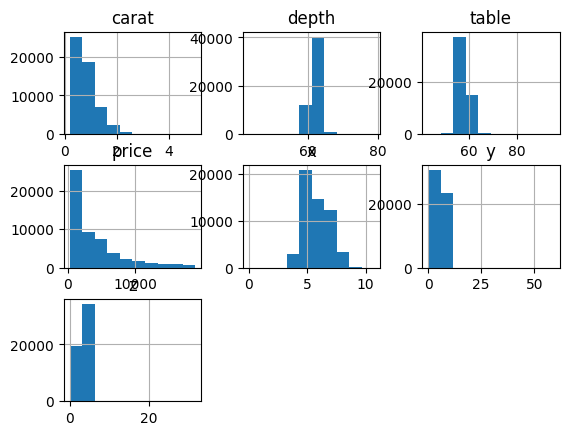

In [1]:
import pandas as pd
diamond = pd.read_csv('https://raw.githubusercontent.com/vincentarelbundock/' +
                      'Rdatasets/master/csv/ggplot2/diamonds.csv', index_col=0)


pd.set_option('display.precision', 2)
print("A) The FirstSseven Rows Of The DataFrame", diamond.head(7), sep="\n", end="\n\n")
print("B) The Last Seven Rows Of The DataFrame", diamond.tail(7), sep="\n", end="\n\n")
print("C)", diamond.describe(), sep="\n", end="\n\n")
print("D)", diamond.iloc[:, 1:4].describe(), sep="\n", end="\n\n")
print("E) Are the unique values of Series object.", end="\n\n")
print("F)", end='\n\n')
# %matplotlib
hist = diamond.hist()

9. 17 ***(Working with the Iris.csv Dataset in Pandas)*** Another popular dataset for machine-learning novices is the Iris dataset, which contains 150 records of information about three Iris plant species. Like this diamonds dataset, the Iris dataset is available from various online sources, including Kaggle. Investigate the Iris dataset’s columns, 18 then perform the following tasks to study and analyze the dataset:
- a) Download Iris.csv from one of the dataset repositories.
- b) Load the dataset into a pandas DataFrame with the following statement, \
&emsp; which uses the first column of each record as the row index:
``` py
         df = pd.read_csv('Iris.csv', index_col=0)
```
- c) Display the DataFrame’s head.
- d) Display the DataFrame’s tail.
- e) Use the DataFrame method describe to calculate the descriptive statistics for the numerical data columns—*SepalLengthCm*, *SepalWidthCm*, *PetalLengthCm* and *PetalWidthCm*.
- f) Pandas has many built-in graphing capabilities. Execute the *%matplotlib* magic to enable Matplotlib support in IPython. Then, to view histograms of each numerical data column, call your DataFrame's *hist* method.

A) The Head Of The Data Frame
   Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
1           5.1          3.5           1.4          0.2  setosa
2           4.9          3.0           1.4          0.2  setosa
3           4.7          3.2           1.3          0.2  setosa
4           4.6          3.1           1.5          0.2  setosa
5           5.0          3.6           1.4          0.2  setosa

B) The Tail Of The Data Frame
     Sepal.Length  Sepal.Width  Petal.Length  Petal.Width    Species
146           6.7          3.0           5.2          2.3  virginica
147           6.3          2.5           5.0          1.9  virginica
148           6.5          3.0           5.2          2.0  virginica
149           6.2          3.4           5.4          2.3  virginica
150           5.9          3.0           5.1          1.8  virginica

C)
       Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
count        150.00       150.00        150.00       150.00
mean           5.

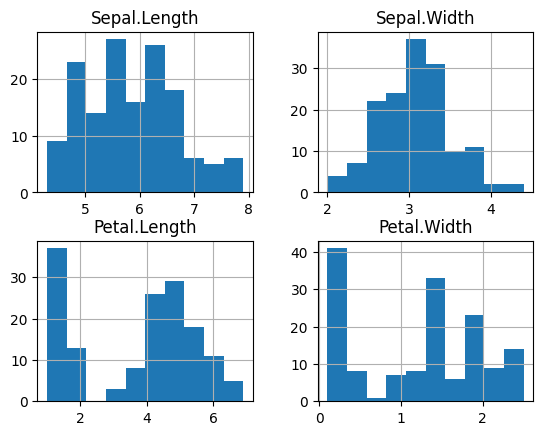

In [3]:
import pandas as pd

df = pd.read_csv('iris.csv', index_col=0)

pd.set_option('display.precision', 2)

print("A) The Head Of The Data Frame", df.head(), sep='\n', end='\n\n')
print("B) The Tail Of The Data Frame", df.tail(), sep='\n', end='\n\n')
print("C)", df.describe(), sep='\n', end='\n\n')
print("D)", end='\n\n')
# %matplotlib
hist = df.hist()


9. 18 ***(Project: Anscombe’s Quartet CSV)*** Locate a CSV file online containing the data for Anscombe's Quartet. Load the data into a pandas *DataFrame*. Investigate pandas built-in scatter-plot capability for plotting *x-y* coordinate pairs and use it to plot the *x-y* coordinate pairs in Anscombe's Quartet.

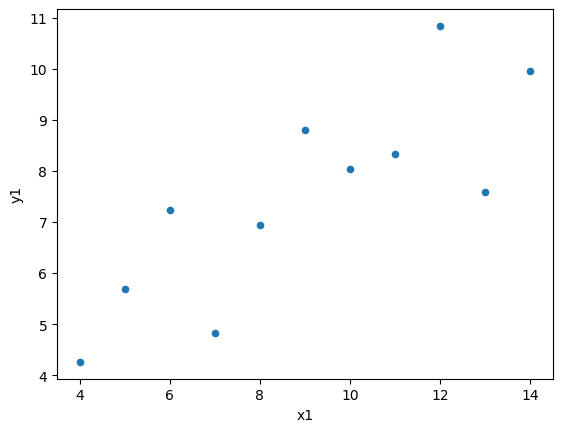

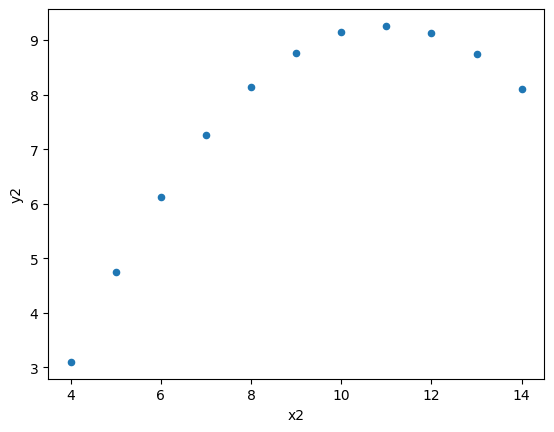

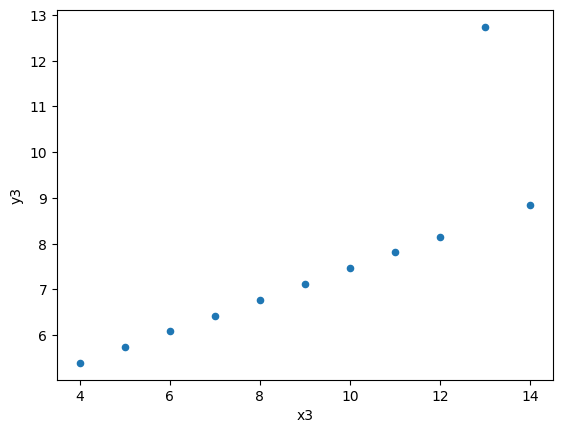

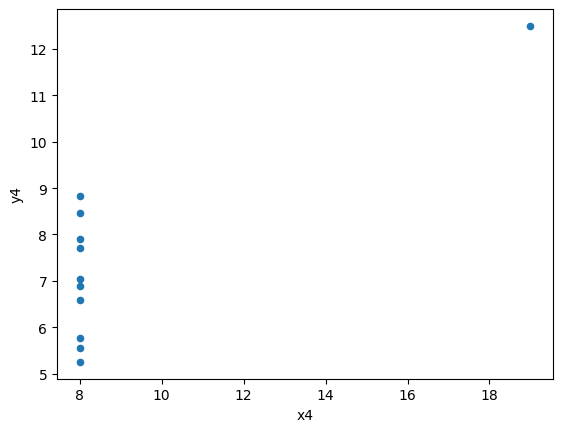

In [4]:
import pandas as pd
df = pd.read_csv('anscombe.csv')

for n in range(1,5): 
    df.plot.scatter(x = 'x' + str(n) ,
                    y = 'y' + str(n)) 
    